# Predicting Heart Disease using Machine Learning
This notebook looks into using various Python based Machine Learning and Data Science libraries in an attempt to build a machine learning model capable of predicting if or not someone has heart disease based on their medical attributes.

We are going to take the following approach:
1. Problem Definition
2. Data
3. Features
4. Modelling
5. Experimentation

## 1. Problem Definition
In the statement
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the UCI Machine Learning Repositoty. (https://archive.ics.uci.edu/dataset/45/heart+disease)

There is also a version of it available on Kaggle. (https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset)

## 3. Evaluation
> If we can reach 90% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features
Different information about each of the features in the data.
#### Create data dictionary
* ##### Age:
  Displays the age of the individual.
* ##### Sex:
  1 = male 0 = female
* #####  CP:
   0 = typical angina 1 = atypical angina 2 = non — anginal pain 3 = asymptotic
* ##### Trestbps:
  Displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.
* ##### Cho: Serum Cholestrol:
  Displays the serum cholesterol in mg/dl (unit)
* ##### FBS- Fasting Blood Sugar:
  If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes
* ##### Restecg- Resting ECG:
  Displays resting electrocardiographic results 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy
* ##### Thalach- Max heart rate achieved:
  Displays the max heart rate achieved by an individual.
* ##### Exang- Exercise induced angina:
  1 = yes 0 = no
* ##### Oldpeak- ST depression induced by exercise relative to rest:
  Displays the value which is an integer or float.
* ##### Slope- Slope of the peak exercise ST segment:
  0 = upsloping: better heart rate with excercise (uncommon) 1 = flat: minimal change (typical healthy heart) 2 = downsloping: signs of unhealthy heart
* ##### CA- Number of major vessels (0–3) colored by flourosopy:
  Displays the value as integer or float.
* ##### Thal - Displays the thalassemia:
  1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising
* ##### Target - Displays whether the individual is suffering from heart disease or not:
  1 = yes 0 = no

## Preparing the tool
We are going to use Pandas, Matplotlib and Numpy for Data Analysis and Manipulation.

In [3]:
# Regular EDA (Exploratory Data Analysis) and Plotting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libraries for Modelling
import xgboost as xgb 
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import RocCurveDisplay


## Load Data

In [4]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (EDA)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


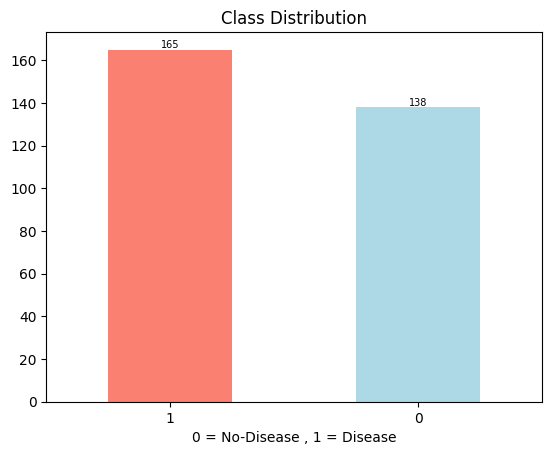

In [6]:
# Let's find out how many of each class is there:

ax = df.target.value_counts().plot.bar(color=["Salmon","LightBlue"])
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, str(height),
    ha = 'center', va = 'bottom', fontsize = 7)
plt.title("Class Distribution")
plt.xlabel("0 = No-Disease , 1 = Disease")
plt.xticks(rotation = 0)
plt.show();

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

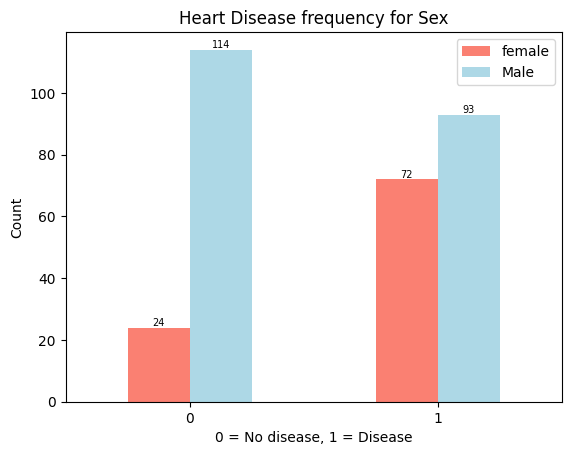

In [11]:
# Compare target column with the sex column

ax = pd.crosstab(df.target,df.sex).plot.bar(color=["Salmon","LightBlue"])
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, str(height),
    ha ="center", va = "bottom", fontsize = 7)
plt.title("Heart Disease frequency for Sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Count")
plt.legend(["female","Male"])
plt.xticks(rotation = 0);

### Age vs. Maximum Heart Rate for Heart Disease

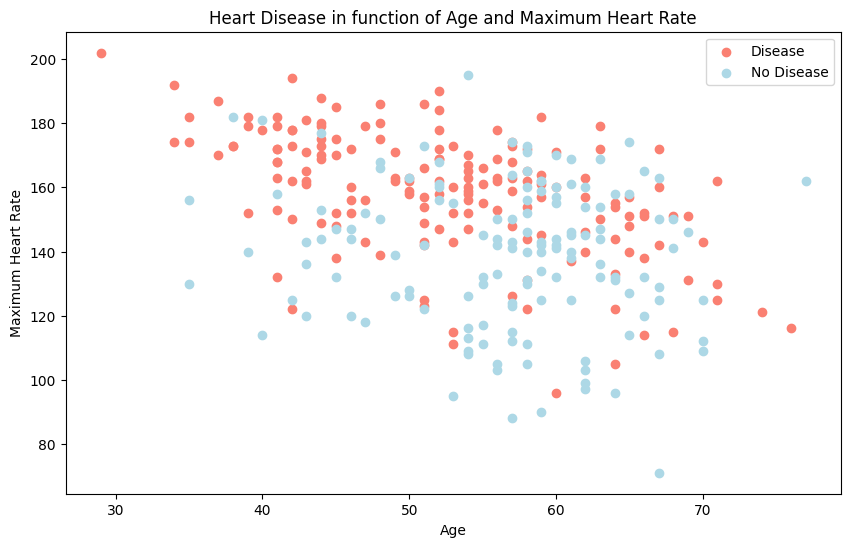

In [12]:
# Create another figure
plt.figure(figsize = (10,6))

#Scatter with Positive examples
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            color = "Salmon")

# Scatter with Negative examples
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            color = "lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Maximum Heart Rate")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.legend(["Disease" , "No Disease"])
plt.show();

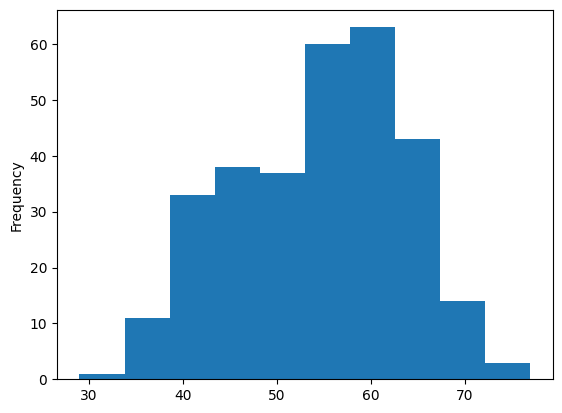

In [13]:
# Check the distribution of age (outliers, if any) column with the Histogram
df.age.plot.hist();

### Heart Disease frequency per Chest Pain Type

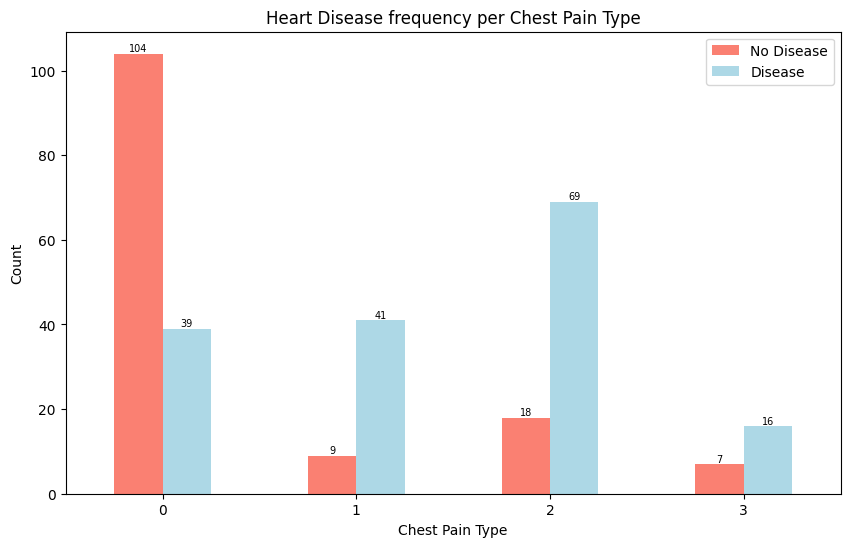

In [15]:
# Creating the crosstab
ax = pd.crosstab(df.cp,df.target).plot.bar(figsize = (10,6), color = ["salmon","lightblue"])

for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, str(height),
    ha = "center", va = "bottom", fontsize = 7)

# Add some helpful info
plt.title("Heart Disease frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

# Make a correlation matrix

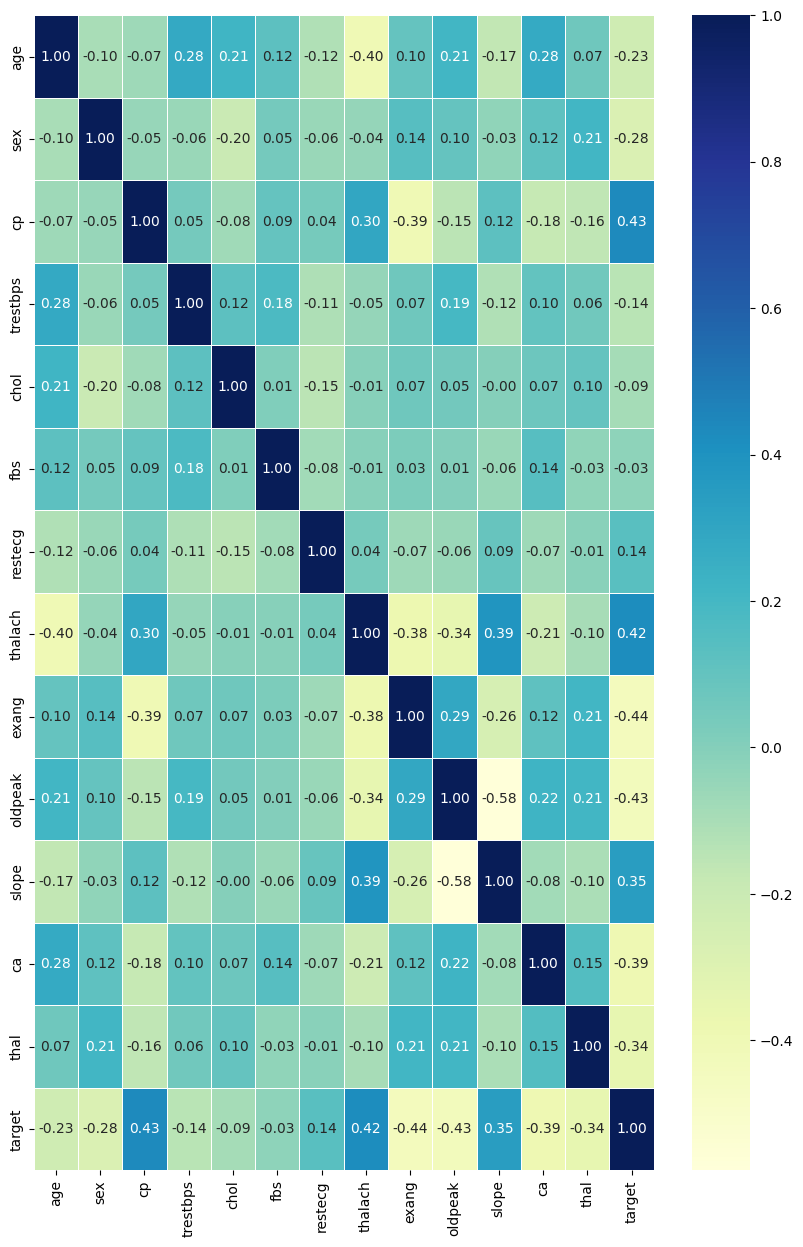

In [16]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (10,15))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = "0.2f",
                 cmap = "YlGnBu");

## Modelling

In [17]:
# Split the data into X and Y

X = df.drop("target",axis = 1)
Y = df["target"]

In [18]:
# Split the data into Train and Test sets
np.random.seed(42)
X_train,X_test,Y_train,Y_test = train_test_split(X,
                                                 Y,
                                                 test_size=.2)

Now we have got our data split into train and test sets, it's time to build the machine learning models!

We'll train (find the patterns) in training set.
We'll use it (identified patterns) in the test set.

We are going to try 4 different Machine Learning models:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [19]:
# Put models in a dictionary
models = {"Logistic Regression" : LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "XGBoost": xgb.XGBClassifier()}

# Create a function to fit and score models
def fit_and_score (models, X_train, X_test, Y_train, Y_test):

    """
    Fits and evaluates machine learning model.
    """

    # Set Random Seed
    np.random.seed(42)

    # Make a dictionary to keep model scores
    model_scores = {}

    #Loop through models
    for name, model in models.items():
        model.fit(X_train,Y_train)
        model_scores[name] = model.score(X_test,Y_test)
    return model_scores

In [20]:
model_scores = fit_and_score (models = models,
                              X_train = X_train,
                              X_test = X_test,
                              Y_train = Y_train,
                              Y_test = Y_test)
model_scores

C:\Users\hp\Desktop\Heart_Disease\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918,
 'XGBoost': 0.819672131147541}

### Model Comparison

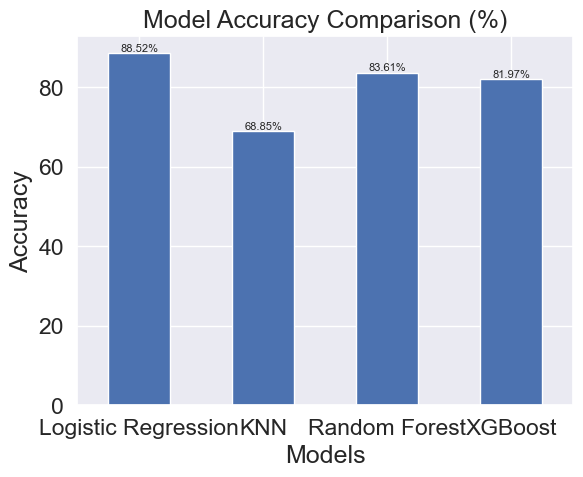

In [82]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare = model_compare.apply(lambda x:x*100)
ax = model_compare.T.plot.bar(legend = False);

# Add some communication
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2,height,f'{height:.2f}%',
                       ha = "center", va = "bottom", fontsize = 8)
plt.title("Model Accuracy Comparison (%)")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.xticks(rotation = 0);

# Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross Validation
* Classification Report
* ROC Curve

## Hyperparameter Tuning

#### Hyperparameter tuning with RandomizedSearchCV
We are going to tune:
* LogisticRegression()
* RandomForestClassifier()
* XGBClassifier()

    ...using RandomizedSearchCV

In [22]:
# Create a Hyperparameter grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4,4,20),
                "penalty": ['l1', 'l2'],
                "solver": ['liblinear'], 
                "class_weight": [None, 'balanced']}

# Create a Hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2,20,2),
            "min_samples_leaf": np.arange(1,20,2)}

# Create a Hyperparameter grid for XGBClassifier
xgb_grid = {"n_estimators": np.arange(10,1000,50),
            "learning_rate": [0.01,0.05,0.1],
            "max_depth": [3,6,9],
            "subsample": [0.8,1],
            "colsample_bytree": [0.8,1]}

In [23]:
# Tune LogisticRegression

np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)
rs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'class_weight': [None, 'balanced'],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   verbose=True)

In [22]:
# Find the best Hyperparameter
rs_log_reg.best_params_

{'solver': 'liblinear',
 'penalty': 'l2',
 'class_weight': None,
 'C': np.float64(0.23357214690901212)}

In [28]:
# Evaluate the best Hyperparameter
rs_log_reg.score(X_test,Y_test)

0.8852459016393442

In [24]:
# Tune for RandomForestCLassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)
rs_rf.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [27]:
# Find the best Hyperparameter
rs_rf.best_params_

{'n_estimators': np.int64(560),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(15),
 'max_depth': 5}

In [26]:
# Evaluate the best Hyperparameter
rs_rf.score(X_test,Y_test)

0.8688524590163934

In [30]:
# Tune for XGBClassifier
rs_xgb = RandomizedSearchCV(XGBClassifier(),
                            param_distributions = xgb_grid,
                            cv = 5,
                            n_iter = 20,
                            verbose = True)
rs_xgb.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.8, 1],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 6, 9],
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960]),
                                        'subsample': [0.8, 1]},
                   verbose=True)

In [31]:
# Find the best Hyperparameter
rs_xgb.best_params_

{'subsample': 0.8,
 'n_estimators': np.int64(260),
 'max_depth': 6,
 'learning_rate': 0.1,
 'colsample_bytree': 1}

In [32]:
# Evaluate the best Hyperparameter
rs_xgb.score(X_test,Y_test)

0.8524590163934426

## Hyperparameter Tuning with GridSearchCV
Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [30]:
# Different Parameters for our grid search model

log_reg_grid = {"C": np.logspace(-4,4,40),
                "penalty": ['l1', 'l2'],
                "solver": ['liblinear'], 
                "class_weight": [None, 'balanced']}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv = 5,
                          verbose = True)

gs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.60371874e-04, 2.57191381e-04, 4.12462638e-04,
       6.61474064e-04, 1.06081836e-03, 1.70125428e-03, 2.72833338e-03,
       4.37547938e-03, 7.01703829e-03, 1.12533558e-02, 1.80472177e-02,
       2.89426612e-02, 4.64158883e-02, 7.44380301e-02, 1.19377664e-01,
       1.91448198e-01, 3.07029063e-01, 4.923882...
       1.26638017e+00, 2.03091762e+00, 3.25702066e+00, 5.22334507e+00,
       8.37677640e+00, 1.34339933e+01, 2.15443469e+01, 3.45510729e+01,
       5.54102033e+01, 8.88623816e+01, 1.42510267e+02, 2.28546386e+02,
       3.66524124e+02, 5.87801607e+02, 9.42668455e+02, 1.51177507e+03,
       2.42446202e+03, 3.88815518e+03, 6.23550734e+03, 1.00000000e+04]),
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             verbose=True)

## Evaluating our tuned machine learning classifier beyond accuracy

* ROC curve and AUC score
* Confusion Matrix
* Classification Score
* Precision Score
* Recall Score
* F1-Score



  ...and it would be great to plug Cross Validation where possible.

In [34]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

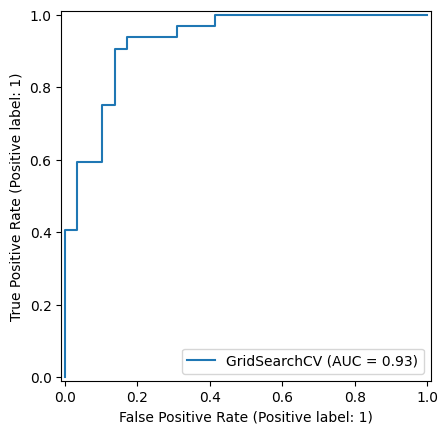

In [42]:
from sklearn.metrics import RocCurveDisplay

# Create and plot ROC curve
RocCurveDisplay.from_estimator(gs_log_reg, X_test, Y_test);

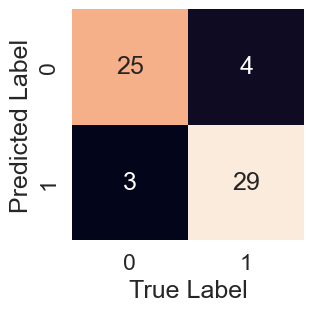

In [47]:
# Confusion matrix

sns.set(font_scale=1.5)

def plot_conf_mat(Y_test,Y_preds):
    """
    Plots a nice looking Confusion Matrix using Seaborn's Heatmap)
    """

    fig, ax = plt.subplots(figsize =(3,3))
    ax = sns.heatmap(confusion_matrix(Y_test,y_preds),
                    annot = True,
                    cbar = False)

plot_conf_mat(Y_test,y_preds)

plt.xlabel("True Label")
plt.ylabel("Predicted Label");


In [48]:
# Let's get a classification report as well as Cross Validated - Precision, Recall and F1 score

print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using Cross-Validation

We're going to calculate Precision, Recall, F1 Scores using cross_val_score()!

In [50]:
# Check best Hyperparameters
gs_log_reg.best_params_

{'C': np.float64(0.19144819761699575),
 'class_weight': None,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [54]:
# Create a new classifier model with the best Hyperparameter

clf = LogisticRegression(C =  np.float64(0.19144819761699575),
                         class_weight = None,
                         penalty = 'l2',
                         solver = 'liblinear')

In [56]:
# Cross-Validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         Y,
                         cv = 5,
                         scoring = "accuracy")

cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8446994535519124)

In [57]:
# Cross-Validated Precision
cv_precision = cross_val_score(clf,
                               X,
                               Y,
                               cv = 5,
                               scoring = "precision")

cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.8207936507936507)

In [58]:
# Cross-Validated Recall
cv_recall = cross_val_score(clf,
                            X,
                            Y,
                            cv = 5,
                            scoring = "recall")

cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9212121212121213)

In [59]:
#Cross-Validated F1
cv_f1 = cross_val_score(clf,
                        X,
                        Y,
                        cv = 5,
                        scoring = "f1")

cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8673007976269721)

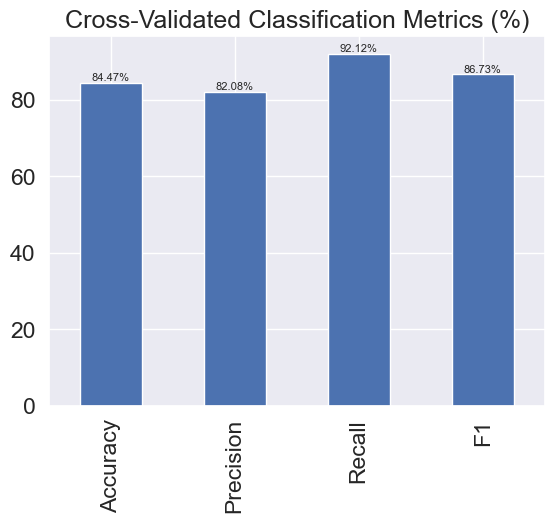

In [83]:
# Visualise Cross-Validated metrics

cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                             index = [0])

cv_metrics = cv_metrics.apply(lambda x:x*100)
ax = cv_metrics.T.plot.bar(legend = False)
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}%',
    ha = "center", va = "bottom", fontsize = 8)
plt.title("Cross-Validated Classification Metrics (%)");

### Feature Importance

Feature Importance is which features contributed most to the outcomes of the model and how much they contributed?

Finding Feature Importance is different for each machine learning model.

Let's find out Feature Importance for our LogisticRegression model!

In [94]:
# Match coef's of featueres to columns

features_dict = dict(zip(df.columns,
                         list(clf.coef_[0])))
features_dict

{'age': np.float64(0.0028951891741162204),
 'sex': np.float64(-0.837349085210479),
 'cp': np.float64(0.6535283244848925),
 'trestbps': np.float64(-0.011567916399274573),
 'chol': np.float64(-0.0016420928451171988),
 'fbs': np.float64(0.04176191257146454),
 'restecg': np.float64(0.3042371275680201),
 'thalach': np.float64(0.02451658417514702),
 'exang': np.float64(-0.589884429012285),
 'oldpeak': np.float64(-0.5650317272279558),
 'slope': np.float64(0.44063325039989765),
 'ca': np.float64(-0.6294745927704666),
 'thal': np.float64(-0.6675462120616419)}

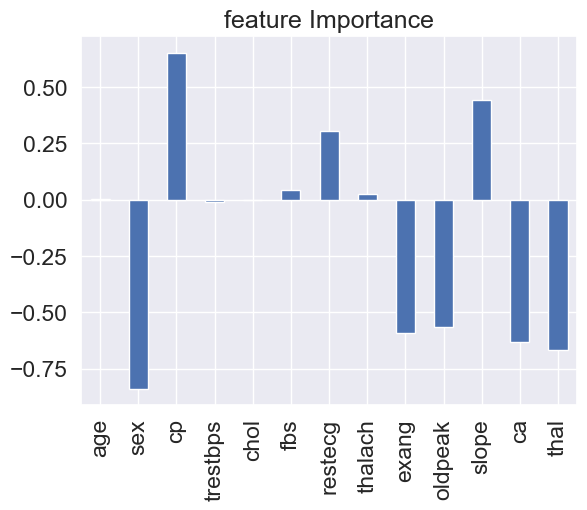

In [99]:
# Visualise Feature Imporrtance

feature_df = pd.DataFrame(features_dict,
                          index = [0])

feature_df.T.plot.bar(title = "feature Importance", 
                      legend = False);